# İNTEGRAL - SİMPSON VE TRAPEZ FORMÜLLERİ

Bir f(x) fonksiyonunun, tanımlı olduğu bir [a,b] aralığındaki belirli integrali,
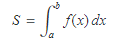

ifadesiyle gösteririz. Geometrik yoruma göre bu integral, [a,b] aralığında f(x) eğrisi ile x-ekseni arasında kalan yüzeyin alanı olur. 

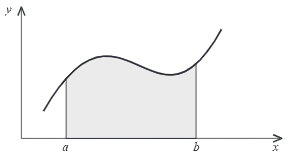
[a,b] aralığında eşit aralıklarla sıralanmış N sayıda nokta belirleyelim. Buna göre, h adım uzunluğu,

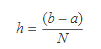
olup, uç noktaları da katarak bu noktaları şöyle adlandırabiliriz:

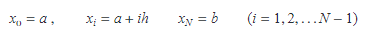

İntegralin herbir [xi,xi+1] alt aralıklarındaki integral değerlerinin toplamı olacaktır:

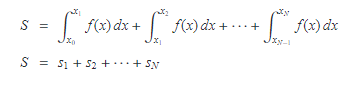

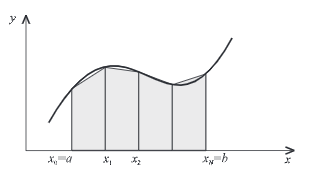
Eğer h adımı çok küçükse, en basit yanlışlıkta, herbir aralıkta fonksiyonu bir doğru parçası olarak alırız. Bu durumda [xi,xi+1] aralığında oluşan yamuğun alanı hesaplanabilir:

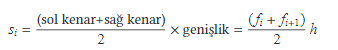
O halde, N sayıda yamuk alanı toplanırsa, sayısal integral için trapez formülünü bulmuş oluruz:

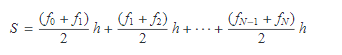
veya,

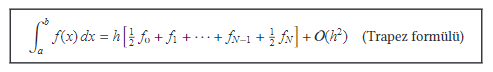
Trapez formülünde iki nokta arasını bir doğruyla birleştirmekten kaynaklanan hata payının O(h²) olduğunu gösterebiliriz.

Daha iyi bir yaklaşıklık bulabilir miyiz? Evet. Bu amaçla, N sayısı çift alınır ve ardışık iki alt aralık birlikte ele alınırsa,


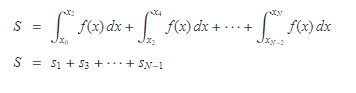

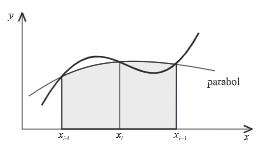

Herbir si integrali xi noktası etrafındaki [xi-1,xi+1] çift aralığının katkısını verir. Bu si aralığını oluşturan üç noktayı, doğru parçalarıyla birleştirmek yerine, bir parabolle temsil edersek, yaptığımız hata daha az olacaktır

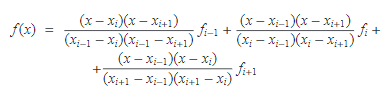

Bu ifade yerine konur ve si integrali analitik olarak alınırsa,

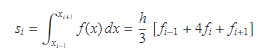

bulunur. Bu si ifadeleri S integralinde yerine konur ve düzenleme yapılırsa, Simpson formülüni buluruz:


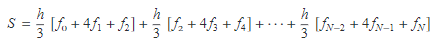
veya,

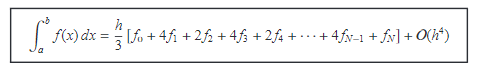
Simpson formülünde üç noktayı birleştirmekten kaynaklanan hata payının O(h⁴) olduğunu gösterebiliriz. 

Trapezin alanı hesaplayan denklemi ihtiyaç duyduğumuzda kullanabilmek için fonksiyon olarak yazalım. a,b ve N parametrelerini alacak ve S değişkenini döndürecek şekilde yazmak şuan için doğru olacaktır.

In [2]:
def trapez(a,b,n):
    
    if n<1 or a>b:
        print("Hatalı veri")
        
    else:
        h=(b-a)/n
        s=0.5*(f(a)+f(b))
        
        for i in range(1,n):
            x=a+(i*h)
            s=s+f(x)
            
        return h*s

Fonksiyon çağırıldığında n=1 olduğu durumda herhangi bir işlem gerçekleşmez bu istediğimiz bir durum değildir. Yada b<a olduğu durumlarda h

Benzer şekilde, Simpson formülüyle integral hesaplayan fonksiyonu yazacak olursak

In [3]:
def simpson(a,b,n):
    
    if n<1 or a>b:
        print("Hatalı veri")
        
    elif n%2==1:
        print("n çift değil")
        
    else:
        h=(b-a)/n
        s=f(a)+f(b)
        
        for i in range(1,n):
            katsayi=2*(i%2+1)
            x=a+(i*h)
            s=s+katsayi*f(x)
            
    return h*s/3.0

## Formüllerin Karşılaştırılması

Yukarıda tanımladığımız fonksiyonları kullanarak Simpson ve Trapez formüllerini karşılaştıralım. Bunun için sonucunu bildiğimiz bir integrali kullanmak doğru olacaktır.

       [0,1]     S= ∫eˣdx = e-1 = 1.71828183

In [10]:
from numpy import *


def trapez(a,b,n):
    
    if n<1 or a>b:
        print("Hatalı veri")
        
    else:
        h=(b-a)/n
        s=0.5*(f(a)+f(b))
        
        for i in range(1,n):
            x=a+(i*h)
            s=s+f(x)
            
        return h*s
    
def simpson(a,b,n):
    
    if n<1 or a>b:
        print("Hatalı veri")
        
    elif n%2==1:
        print("n çift değil")
        
    else:
        h=(b-a)/n
        s=f(a)+f(b)
        
        for i in range(1,n):
            katsayi=2*(i%2+1)
            x=a+(i*h)
            s=s+katsayi*f(x)
            
    return h*s/3.0


# e sayısını döndüren fonksiyonu yazalım
def f(x):
    return exp(x)

a=0.0
b=1.0
stam= f(1)-f(0)
n=4

print("N", "Trapez Hatası", "Simpson Hatası")

for i in range(6):
    print(n, "%.8f" %float(trapez(a,b,n)-stam),"%.8f" %float(simpson(a,b,n)-stam))
    n=n+4

N Trapez Hatası Simpson Hatası
4 0.00894008 0.00003701
8 0.00223676 0.00000233
12 0.00099426 0.00000046
16 0.00055930 0.00000015
20 0.00035796 0.00000006
24 0.00024859 0.00000003


Yazdığımız program N=4,8,...,24 sayıda nokta kullanarak trapez ve Simpson formüllerini hesapladı ve sonrasında gerçek değerden farkını bulup ekrana yazdırdı. Buradan şu sonuçları çıkarabiliriz:

- Sonuçta okulda bize öğretildiği gibi hesaba katılan nokta sayısı sonsuza yaklaştıkça gerçek değere yaklaşmış oluyoruz. 
- Simpson formülü trapez formülüne göre daha doğru sonuç verir.



Peki, N sayısını nasıl seçeçeğiz? Bu sorunun cevabı O(h²) ve O(h⁴) hata terimlerinde saklı. h = (b-a)/N olduğundan, N arttıkça hata payının çok hızlı değiştiği gözlenir. Çok artırıldığında ise yuvarlama hatasıyla karşılaşabiliriz. 

N sayısını belirlemenin en iyi yolu deneme-yanılma yöntemidir. N sayısını her seferinde 2 katına çıkararak integral sonucunun belirli bir değere yaklaşmasını inceleriz. Değerden ıraksamaya başladığında dururuz. 